# Library Load

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import pandas as pd
from multiprocessing import Pool
import re

## Functions

In [2]:
def random_uniform(size) :
    _  = np.random.uniform(low = -1 , high = 1 , size = [size])[:,np.newaxis]
    return _

def noise(size) :
    _  = np.random.normal(loc = 0 , scale = 1 , size = [size])[:,np.newaxis]
    return _

def generate_x(size) :
    total = random_uniform(size)
    for _ in np.arange(19) :
        column = random_uniform(size)
        total = np.concatenate( (total , column) , axis = 1)
    return total

def plotting(data , title , lambda_list ) :
    f, ax = plt.subplots(figsize = (15,10))
    for idx , i in enumerate(data.columns.tolist()) :
        plt.plot(np.array(lambda_list) , data.loc[:,i].values , label = str(idx))
    plt.legend(frameon=False, loc='upper center', ncol=10)
    plt.title(title, color ="yellow", fontsize = 20)
    plt.show()
    


def Loop_Ridge_Lasso_Elastic(lambda_list) :
    ridge_train_mse  , ridge_test_mse = [] , []
    lasso_train_mse , lasso_test_mse = [] , [] 
    elastic_train_mse  , elastic_test_mse = [] , []
    lasso_coef , ridge_coef , elastic_coef = pd.DataFrame() , pd.DataFrame() , pd.DataFrame()
    for i in lambda_list :
        ridge = Ridge(alpha=i)
        ridge.fit(train_x , train_y )
        r_coef = pd.DataFrame(ridge.coef_)
        ridge_coef = pd.concat([ridge_coef , r_coef], axis = 0)
        train_mse = mean_squared_error(train_y , ridge.predict(train_x) )
        test_mse = mean_squared_error(test_y , ridge.predict(test_x) )
        ridge_train_mse.append(train_mse)
        ridge_test_mse.append(test_mse)
        lasso = Lasso(alpha= i)
        lasso.fit(train_x , train_y )
        l_coef = pd.DataFrame(lasso.coef_).T
        lasso_coef = pd.concat([lasso_coef , l_coef], axis = 0)
        train_mse = mean_squared_error(train_y , lasso.predict(train_x) )
        test_mse  = mean_squared_error(test_y , lasso.predict(test_x) )
        lasso_train_mse.append(train_mse)
        lasso_test_mse.append(test_mse)
        ela = ElasticNet(alpha=i)
        ela.fit(train_x , train_y )
        ela_coef = pd.DataFrame(ela.coef_).T
        elastic_coef = pd.concat([elastic_coef , ela_coef], axis = 0)
        train_mse = mean_squared_error(train_y , ela.predict(train_x) )
        test_mse  = mean_squared_error(test_y , ela.predict(test_x) )
        elastic_train_mse.append(train_mse)
        elastic_test_mse.append(test_mse)
    ridge_coef.reset_index(drop= True , inplace= True)
    lasso_coef.reset_index(drop= True , inplace= True)
    elastic_coef.reset_index(drop= True , inplace= True)
    return ridge_train_mse  , ridge_test_mse , lasso_train_mse , lasso_test_mse , elastic_train_mse  , elastic_test_mse , lasso_coef , ridge_coef , elastic_coef    

## Data Generate

In [3]:
train_n = 100
train_x = generate_x(train_n)
test_n = 10000
test_x = generate_x(test_n)

## Case1

$\beta_1 = \beta_2 = 1 , $
$\beta_3 = \beta_4 = ... = \beta_{20} = 0$

In [4]:
beta = np.array([1] * 2 + [0] * 18)[ :, np.newaxis ]
train_eps = noise(train_n)
test_eps = noise(test_n)
train_y = train_x.dot(beta) + train_eps
test_y = test_x.dot(beta) + test_eps

In [5]:
Lasso()

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [6]:
lambda_list = np.linspace(0.02 , 50.0 , 100)


    
from multiprocessing import Pool    
def multiprocessing_Ridge_Lasso_Elastic(lambda_list) :
    global find_mse
    def find_mse(reg) :
        reg.fit(train_x, train_y)
        coef = reg.coef_
        train_mse = mean_squared_error(train_y , reg.predict(train_x) )
        test_mse = mean_squared_error(test_y , reg.predict(test_x) )
        return train_mse , test_mse , coef
    
    ridge_train_mse  , ridge_test_mse = [] , []
    lasso_train_mse , lasso_test_mse = [] , [] 
    elastic_train_mse  , elastic_test_mse = [] , []
    lasso_coef , ridge_coef , elastic_coef = pd.DataFrame() , pd.DataFrame() , pd.DataFrame()
    for i in lambda_list : 
        regressors_list = [Ridge(alpha=i) ,Lasso(alpha= i) ,ElasticNet(alpha=i) ]
        if __name__ == '__main__':
            with Pool(3) as pool :
                output = pool.map(find_mse,regressors_list)
                pool.close()
                pool.join()
        ridge_train_mse.append(output[0][0])
        ridge_test_mse.append(output[0][1])
        lasso_train_mse.append(output[1][0])
        lasso_test_mse.append(output[1][1])
        elastic_train_mse.append(output[2][0])
        elastic_test_mse.append(output[2][1])
        ridge_coef = pd.concat([ridge_coef , pd.DataFrame(output[0][2])], axis = 0)
        lasso_coef = pd.concat([lasso_coef , pd.DataFrame(output[1][2]).T], axis = 0)
        elastic_coef = pd.concat([elastic_coef , pd.DataFrame(output[2][2]).T], axis = 0)
    return ridge_train_mse  , ridge_test_mse , lasso_train_mse , lasso_test_mse , elastic_train_mse  , elastic_test_mse , lasso_coef , ridge_coef , elastic_coef    



## multiprocessing 으로 해보기

In [7]:
def multiprocessing_Ridge_Lasso_Elastic_v2(lambda_list) :
    global concat_data
    global find_mse
    def find_mse(reg) :
        reg.fit(train_x, train_y)
        coef = reg.coef_
        train_mse = mean_squared_error(train_y , reg.predict(train_x) )
        test_mse = mean_squared_error(test_y , reg.predict(test_x) )
        return train_mse , test_mse , coef
    def concat_data(i) :
        Ridge = pd.DataFrame(np.squeeze(np.array(Ridge_list)[:,2][i])).T
        Lasso = pd.DataFrame(np.squeeze(np.array(Lasso_list)[:,2][i])).T
        Elastic = pd.DataFrame(np.squeeze(np.array(Ela_list)[:,2][i])).T
        return Ridge , Lasso , Elastic

    regressors_list = []
    for i in lambda_list :
        for j in [Ridge(alpha=i) ,Lasso(alpha= i) ,ElasticNet(alpha=i) ] :
            regressors_list.append(j)

    if __name__ == '__main__':
        with Pool(10) as pool :
            output = pool.map(find_mse,regressors_list)
            pool.close()
            pool.join()
    Ridge_list = output[0::3]
    Lasso_list = output[1::3]
    Ela_list   = output[2::3]
    ridge_train_mse  , ridge_test_mse = np.array(Ridge_list)[:,0] , np.array(Ridge_list)[:,1]
    lasso_train_mse , lasso_test_mse = np.array(Lasso_list)[:,0] , np.array(Lasso_list)[:,1]
    elastic_train_mse  , elastic_test_mse = np.array(Ela_list)[:,0] , np.array(Ela_list)[:,1]
    
    if __name__ == '__main__':
        with Pool(10) as pool :
            output = pool.map(concat_data,range(len(lambda_list)))
            pool.close()
            pool.join()
            
    ridge_coef = pd.DataFrame(np.array(output)[:,0,:])
    lasso_coef = pd.DataFrame(np.array(output)[:,1,:])
    elastic_coef = pd.DataFrame(np.array(output)[:,2,:])
    return ridge_train_mse  , ridge_test_mse , lasso_train_mse , lasso_test_mse , elastic_train_mse  , elastic_test_mse , ridge_coef , lasso_coef , elastic_coef    

multiprocessing_Ridge_Lasso_Elastic_v2(lambda_list)


(array([1.0090050258331136, 1.009316870205736, 1.0101491878807878,
        1.0114293855800167, 1.0130961757729273, 1.0150974774683563,
        1.0173887713931011, 1.0199317980696727, 1.0226935176172274,
        1.02564527143424, 1.0287621011377204, 1.0320221911213359,
        1.0354064091211044, 1.0388979251043076, 1.0424818932186755,
        1.0461451848688734, 1.049876163517853, 1.0536644937501072,
        1.0575009786321616, 1.061377420571993, 1.0652865017934472,
        1.069221681263508, 1.073177105483649, 1.0771475310147909,
        1.0811282569738072, 1.0851150660373534, 1.0891041727307849,
        1.093092177977598, 1.097076029046976, 1.1010529841707504,
        1.1050205812117257, 1.1089766098573712, 1.112919086889648,
        1.1168462341461096, 1.1207564588415138, 1.1246483359648338,
        1.1285205925052264, 1.1323720932933483, 1.1362018282723705,
        1.140008901036976, 1.143792518499088, 1.1475519815566984,
        1.1512866766573329, 1.1549960681607885, 1.1586796914

In [107]:
regressors_list = []
for i in lambda_list :
    for j in [Ridge(alpha=i) ,Lasso(alpha= i) ,ElasticNet(alpha=i) ] :
        regressors_list.append(j)

if __name__ == '__main__':
    with Pool(10) as pool :
        output = pool.map(find_mse,regressors_list)
        pool.close()
        pool.join()
Ridge_list = output[0::3]
Lasso_list = output[1::3]
Ela_list   = output[2::3]
ridge_train_mse  , ridge_test_mse = np.array(Ridge_list)[:,0] , np.array(Ridge_list)[:,1]
lasso_train_mse , lasso_test_mse = np.array(Lasso_list)[:,0] , np.array(Lasso_list)[:,1]
elastic_train_mse  , elastic_test_mse = np.array(Ela_list)[:,0] , np.array(Ela_list)[:,1]

def concat_data(i) :
    Ridge = pd.DataFrame(np.squeeze(np.array(Ridge_list)[:,2][i])).T
    Lasso = pd.DataFrame(np.squeeze(np.array(Lasso_list)[:,2][i])).T
    Elastic = pd.DataFrame(np.squeeze(np.array(Ela_list)[:,2][i])).T
    return Ridge , Lasso , Elastic

if __name__ == '__main__':
    with Pool(10) as pool :
        output = pool.map(concat_data,range(len(lambda_list)))
        pool.close()
        pool.join()

Ridge_coef = pd.DataFrame(np.array(output)[:,0,:])
Lasso_coef = pd.DataFrame(np.array(output)[:,1,:])
Ela_coef = pd.DataFrame(np.array(output)[:,2,:])


In [8]:
ridge_train_mse  , ridge_test_mse ,\
lasso_train_mse , lasso_test_mse ,\
elastic_train_mse  , elastic_test_mse ,\
lasso_coef , ridge_coef , elastic_coef  = multiprocessing_Ridge_Lasso_Elastic(lambda_list)

In [9]:
lambda_list = np.linspace(0.02 , 50.0 , 100)

ridge_train_mse  , ridge_test_mse ,\
lasso_train_mse , lasso_test_mse ,\
elastic_train_mse  , elastic_test_mse ,\
lasso_coef , ridge_coef , elastic_coef  = Loop_Ridge_Lasso_Elastic(lambda_list)


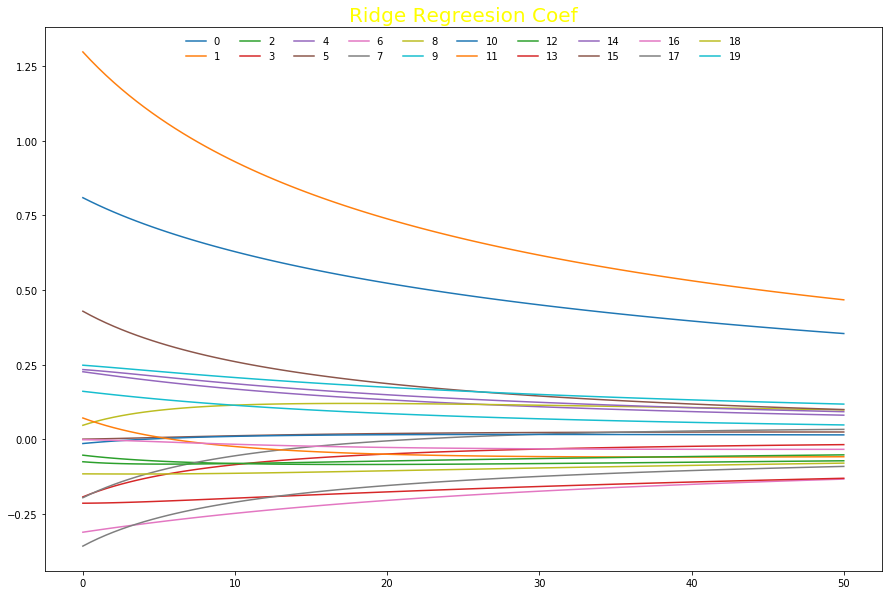

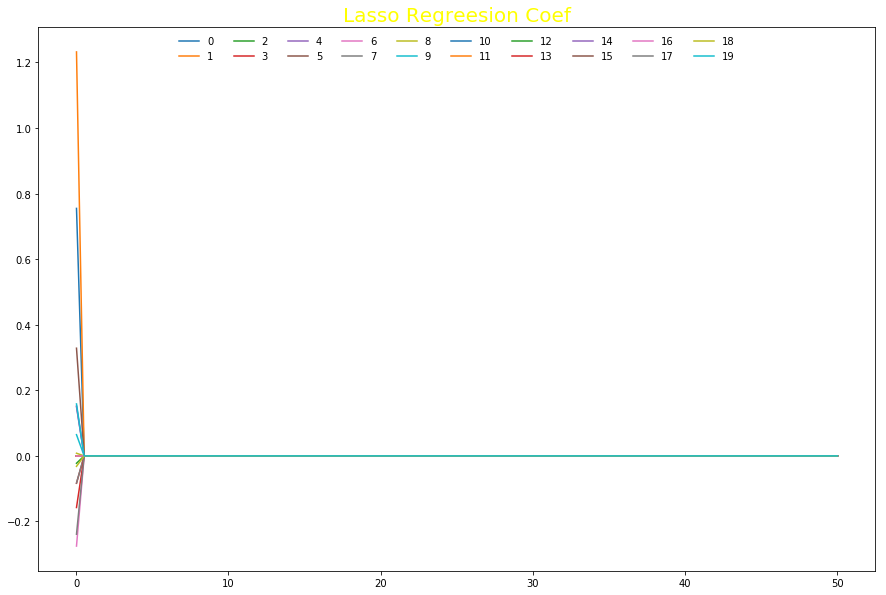

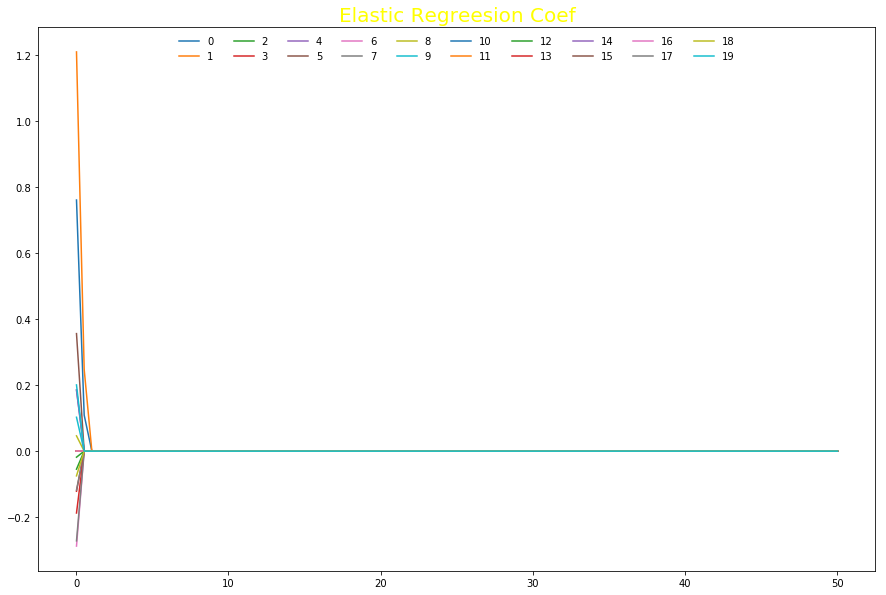

In [106]:
plotting(ridge_coef , "Ridge Regreesion Coef" , lambda_list)
plotting(lasso_coef , "Lasso Regreesion Coef"  , lambda_list)
plotting(elastic_coef , "Elastic Regreesion Coef" , lambda_list)

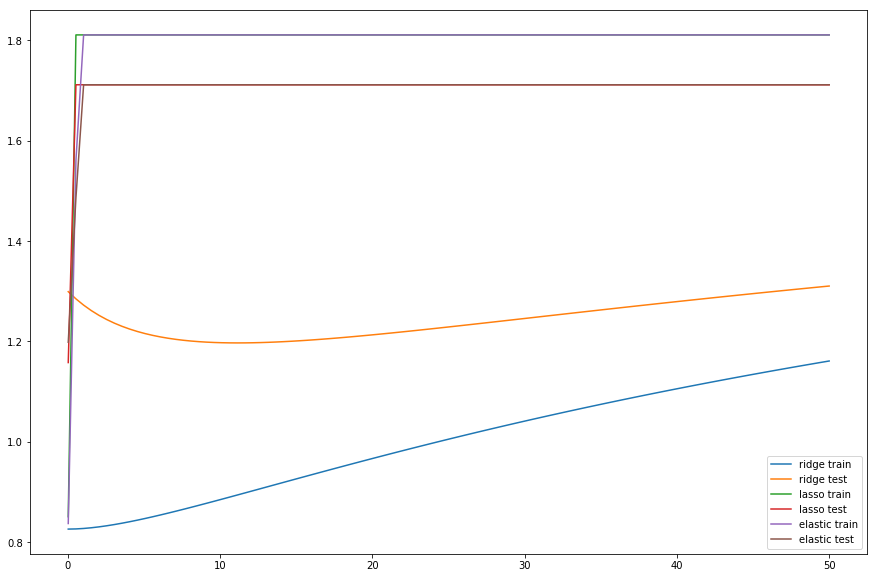

In [103]:
f, ax = plt.subplots(figsize = (15,10))
plt.plot(lambda_list , ridge_train_mse , label ="ridge train") ;
plt.plot(lambda_list , ridge_test_mse , label ="ridge test") ;
plt.plot(lambda_list , lasso_train_mse , label ="lasso train" ) ;
plt.plot(lambda_list , lasso_test_mse , label ="lasso test" ) ;
plt.plot(lambda_list , elastic_train_mse , label ="elastic train" ) ;
plt.plot(lambda_list , elastic_test_mse , label ="elastic test" ) ;
plt.legend()
plt.show()

## Case2

$\beta_1 = \beta_2 = \beta_3 = \beta_4 = ... = \beta_{20} = 1 $

In [8]:
beta = np.array([1] * 20)[ :, np.newaxis ]
train_y = train_x.dot(beta) + train_eps
test_y = test_x.dot(beta) + test_eps

lambda_list = np.linspace(0.02 , 50.0 , 100)

ridge_train_mse  , ridge_test_mse ,\
lasso_train_mse , lasso_test_mse ,\
elastic_train_mse  , elastic_test_mse ,\
lasso_coef , ridge_coef , elastic_coef  = Loop_Ridge_Lasso_Elastic(lambda_list)

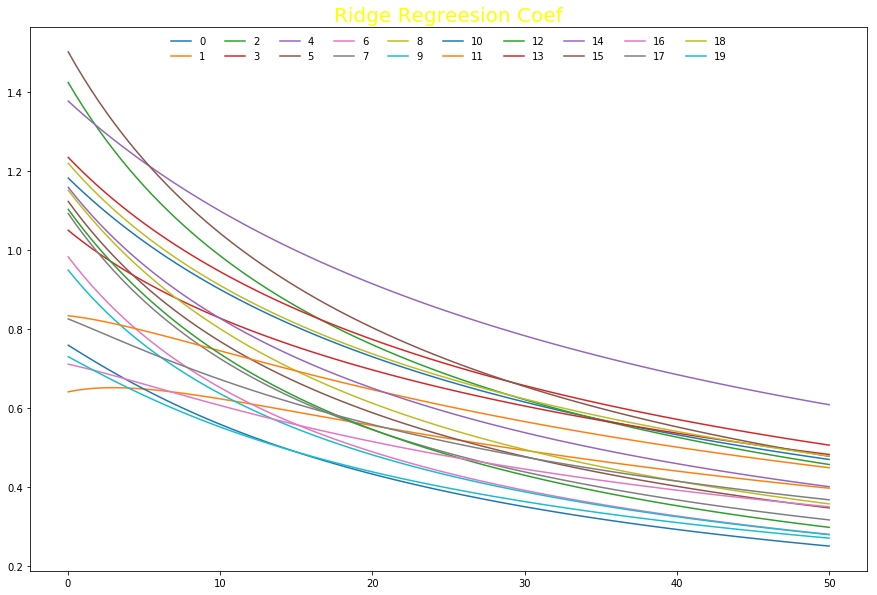

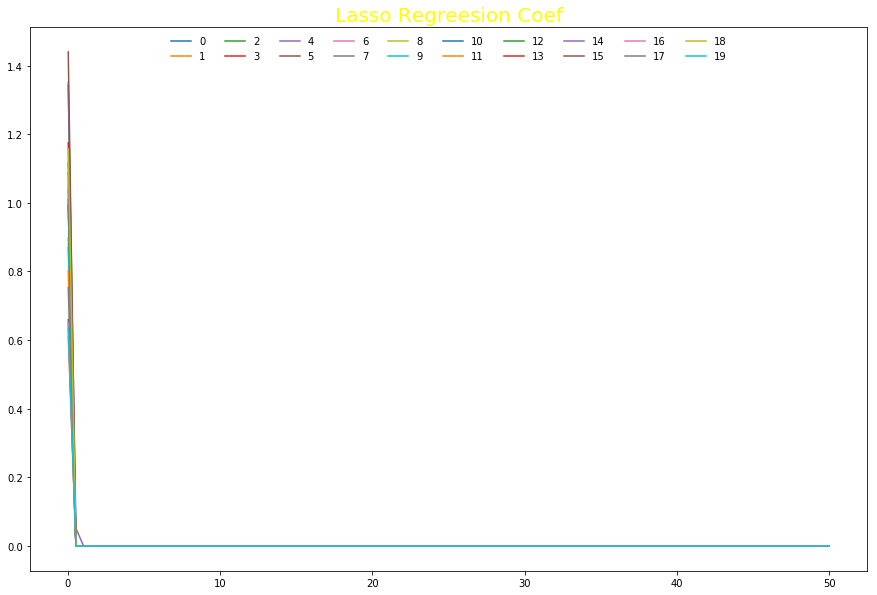

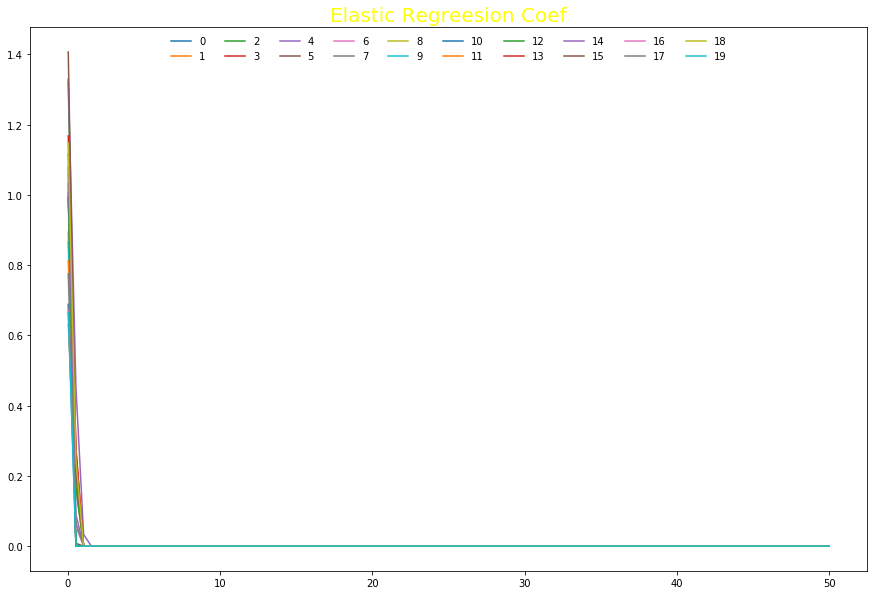

In [9]:
plotting(ridge_coef , "Ridge Regreesion Coef" , lambda_list)
plotting(lasso_coef , "Lasso Regreesion Coef" , lambda_list)
plotting(elastic_coef , "Elastic Regreesion Coef", lambda_list)

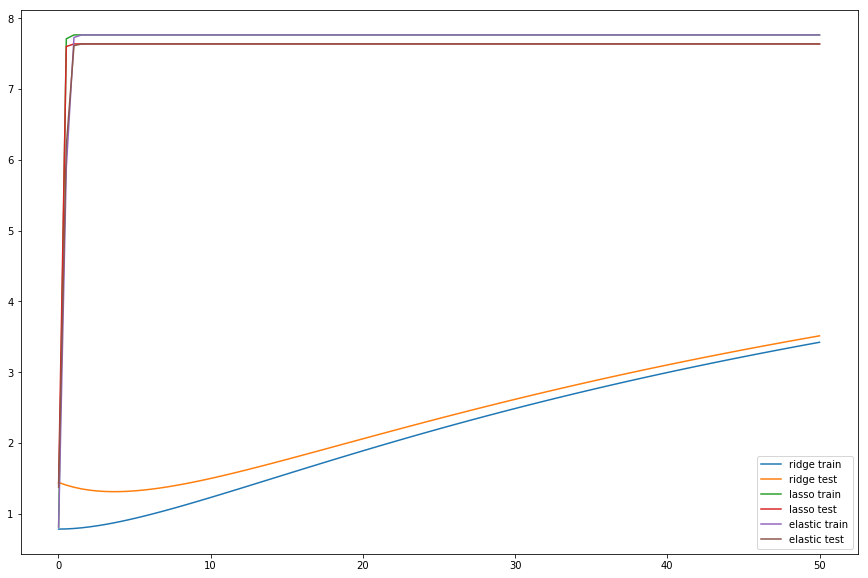

In [10]:
f, ax = plt.subplots(figsize = (15,10))
plt.plot(lambda_list , ridge_train_mse , label ="ridge train") ;
plt.plot(lambda_list , ridge_test_mse , label ="ridge test") ;
plt.plot(lambda_list , lasso_train_mse , label ="lasso train" ) ;
plt.plot(lambda_list , lasso_test_mse , label ="lasso test" ) ;
plt.plot(lambda_list , elastic_train_mse , label ="elastic train" ) ;
plt.plot(lambda_list , elastic_test_mse , label ="elastic test" ) ;
plt.legend()
plt.show()

## Simple Special Case for Ridge Regression and the Lasso

$Suppose  \ X = diag(1_p)=
\begin{bmatrix}
1 & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & 1
\end{bmatrix}
$
<br>
$y_j = \beta_j + \epsilon_j \ \ for \  j \ =  \ 1,2,...,p$

### 1. Usual Least Squares Problem

$\sum_{j=1}^{p}(y_j - \beta_j)^2 $

$Q(\beta) = (y-\beta)^2$

${\partial\over\partial \beta}Q(\beta) = -2(y-\beta) \quad min(\hat\beta) = y$

## 2. Ridge Regression Problem

$\sum_{j=1}^{p}(y_j - \beta_j)^2 + \lambda \sum_{j=1}^{p}\beta_j^{2}$

$Q(\beta) = (1+\lambda)\beta^2 -2\beta y + y^2 = (1+\lambda)(\beta - \frac{y}{1+\lambda})^2+\frac{\lambda}{1+\lambda}y^2$

${\partial\over\partial \beta}Q(\beta) = -2(y-\beta)+2\lambda\beta = 2(-y+\beta(1+\lambda))  $

$min(\hat\beta) = \frac{y}{1+\lambda}$

## 3. Lasso Problem

$\sum_{j=1}^{p}(y_j - \beta_j)^2 + \lambda \sum_{j=1}^{p}|\beta_j|$

$if\;\; \beta \ge 0\,\,, $

$\quad \sum_{j=1}^{p}(y_j - \beta_j)^2 + \lambda \sum_{j=1}^{p}\beta_j$

$if\;\; \beta < 0\,\,, $

$\quad \sum_{j=1}^{p}(y_j - \beta_j)^2 - \lambda \sum_{j=1}^{p}\beta_j$


In [23]:
beta_j = np.random.uniform(-4,4,size =[100])[:,np.newaxis]
beta_j = np.sort(beta_j, axis = 0)
eps = noise(100)
y_j = beta_j + eps
value = (y_j - beta_j)**2